# Problem Statement-

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.

In [121]:
#Let's start with importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

In [122]:
#Read csv file and convert into Dataframe
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Observation-

The features in the above data set are-

- gender     

- SeniorCitizen    

- Partner 

- Dependents 

- PhoneService  

- MultipleLines

- InternetService

- OnlineSecurity

- OnlineBackup

- DeviceProtection

- TechSupport

- StreamingTV

- StreamingMovies

- Contract

- PaperlessBilling

- PaymentMethod

- MonthlyCharges

- TotalCharges
 
The label in the given dataset is-

- Churn  

The columns not required-

- customerID      
         - Each customer has its own unique id, not influencing the model

In [123]:
#shape of file
data.shape

(7043, 21)

In [124]:
# Checking for data types of the columns
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# 
As there are object datatypes, we will apply encoding techniques

In [125]:
#Dropping unnecessary columns as it as no significant influence
data=data.drop(columns=["customerID"])

In [126]:
# Checking for null values
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 
As Total Charges is continuous data, however as it shows object datatype and no null values, the column needs to be treated

In [127]:
data["TotalCharges"]=data["TotalCharges"].replace(" ",np.nan)

In [128]:
# Checking for null values
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# 
The null values have now been observed 

In [129]:
#converting object type of TotalCharges to float

data["TotalCharges"]=data["TotalCharges"].astype(float)

In [130]:
#The null values will be replaced by the mean of the column

data["TotalCharges"]=data["TotalCharges"].fillna(np.mean(data["TotalCharges"]))

In [131]:
# Checking for null values
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 
The null vales have been removed

# Visualization of the Data

Male      3555
Female    3488
Name: gender, dtype: int64


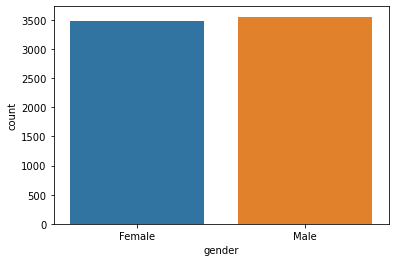

In [132]:
ax=sns.countplot(x="gender", data=data)
print(data["gender"].value_counts())

# 
There are 3555 male customers and 3488 female customers

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


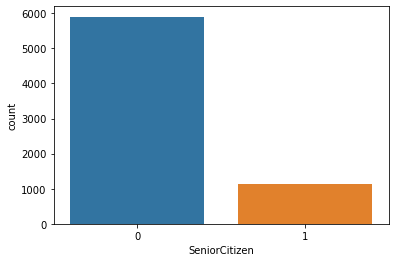

In [133]:
ax=sns.countplot(x="SeniorCitizen", data=data)
print(data["SeniorCitizen"].value_counts())

# 
The number of senior citizen customers are 1142 and the number of young customers are 5901

No     3641
Yes    3402
Name: Partner, dtype: int64


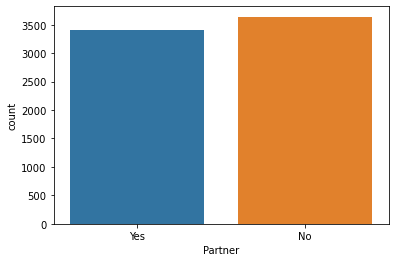

In [134]:
ax=sns.countplot(x="Partner", data=data)
print(data["Partner"].value_counts())

# 
The number of married customers are 3402 and the number of unmarried customers are 3641

No     4933
Yes    2110
Name: Dependents, dtype: int64


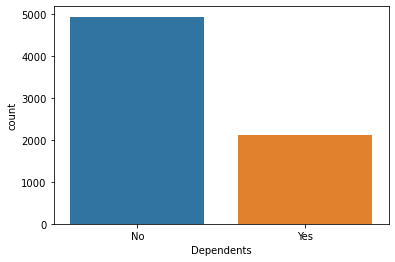

In [135]:
ax=sns.countplot(x="Dependents", data=data)
print(data["Dependents"].value_counts())

# 
The number of dependent customers is 2110 and the number of independent customers are 4933

Yes    6361
No      682
Name: PhoneService, dtype: int64


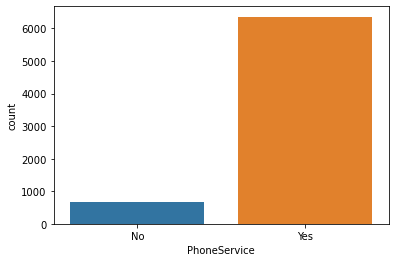

In [136]:
ax=sns.countplot(x="PhoneService", data=data)
print(data["PhoneService"].value_counts())

# 
The number of customers using phone service is 6361 and the number of customers not using phone service is 682

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


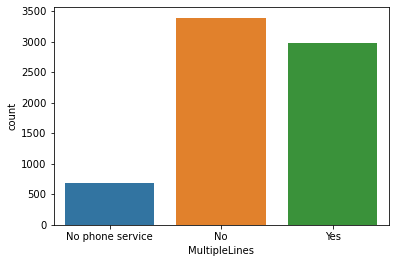

In [137]:
ax=sns.countplot(x="MultipleLines", data=data)
print(data["MultipleLines"].value_counts())

# 
The total number of customers not using any phone service is 682, the total number of customers using no multiple line is 3390 and the the number of customers using multiple lines are 2971

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


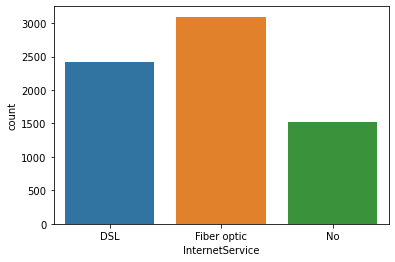

In [138]:
ax=sns.countplot(x="InternetService", data=data)
print(data["InternetService"].value_counts())

# 
The number of customer not using any internet service is 1526, the number of customer using DSL internet service is 2421 and the customer using Fibre Optic internet service is 3096

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


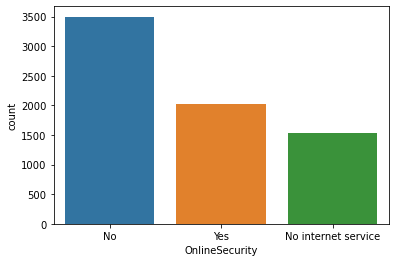

In [139]:
ax=sns.countplot(x="OnlineSecurity", data=data)
print(data["OnlineSecurity"].value_counts())

# 
The number of customer not using any internet service is 1526, not using online security service is 3498 and using online security is 2019 

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


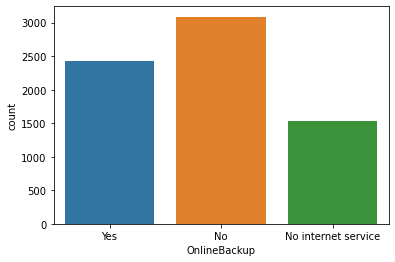

In [140]:
ax=sns.countplot(x="OnlineBackup", data=data)
print(data["OnlineBackup"].value_counts())

# 
The number of customers not using any internet service is 1526, not using online backup service is 3088 and the number of customers using online backup service is 2429

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


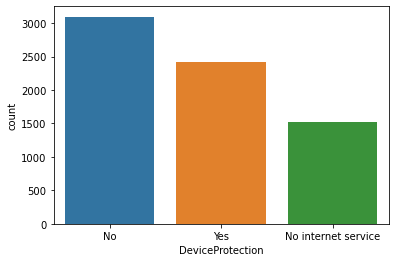

In [141]:
ax=sns.countplot(x="DeviceProtection", data=data)
print(data["DeviceProtection"].value_counts())

# 
The number of customers not using any internet service is 1526, not using device protection is 3095 and the number of customers using device protection service is 2422

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


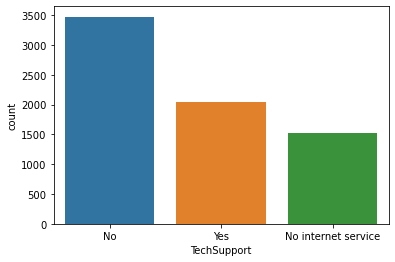

In [142]:
ax=sns.countplot(x="TechSupport", data=data)
print(data["TechSupport"].value_counts())

# 
The number of customers not using any internet service is 1526, not using tech support is 3473 and the number of customers using tech support service is 2044

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


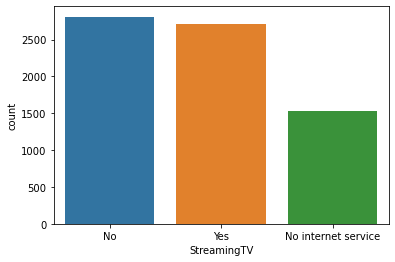

In [143]:
ax=sns.countplot(x="StreamingTV", data=data)
print(data["StreamingTV"].value_counts())


The number of customers not using any internet service is 1526, not using streaming tv is 2810 and the number of customers using streaming tv is 2707

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


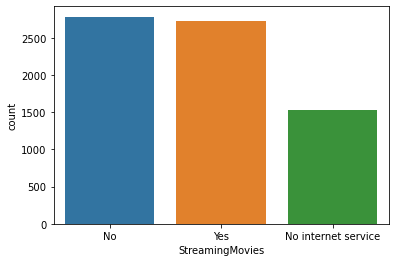

In [144]:
ax=sns.countplot(x="StreamingMovies", data=data)
print(data["StreamingMovies"].value_counts())

# 
The number of customers not using any internet service is 1526, not using streaming movies is 2785 and the number of customers using streaming movies is 2732

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


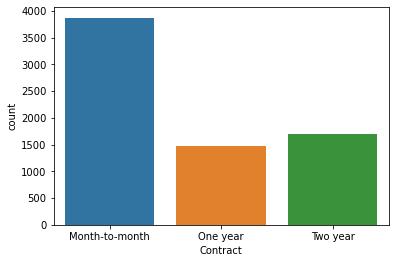

In [145]:
ax=sns.countplot(x="Contract", data=data)
print(data["Contract"].value_counts())

# 
3875 have monthly contact, 1473 have one-year contract and 1695 have two-year contract

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


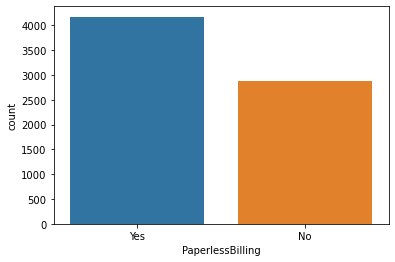

In [146]:
ax=sns.countplot(x="PaperlessBilling", data=data)
print(data["PaperlessBilling"].value_counts())

# 
4171 have paperless billing, while 2872 have paper billing method

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


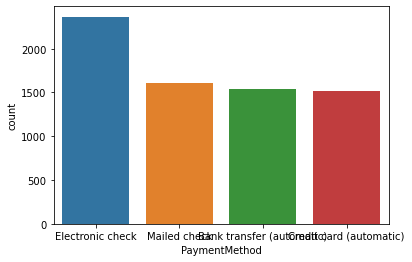

In [147]:
ax=sns.countplot(x="PaymentMethod", data=data)
print(data["PaymentMethod"].value_counts())

# 
2365 pay using electronic check, 1612 pay using mailed check, 1544 pay by automatic bank transfer and 1522 pay by credit card

No     5174
Yes    1869
Name: Churn, dtype: int64


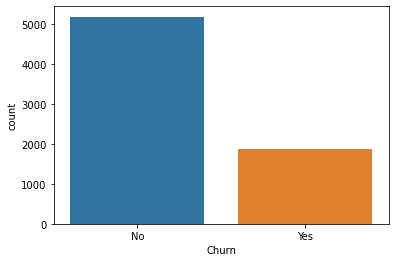

In [148]:
ax=sns.countplot(x="Churn", data=data)
print(data["Churn"].value_counts())

# 
5174 have not yet churned, whereas 1869 customers have churned (stopped using the business)

<AxesSubplot:ylabel='Frequency'>

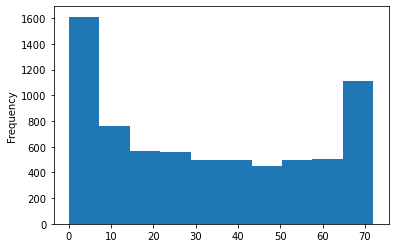

In [149]:
data.tenure.plot(kind='hist')

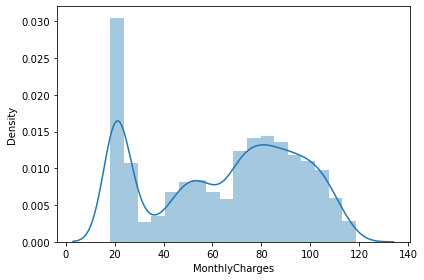

In [150]:
sns.distplot(data["MonthlyCharges"])
plt.xlabel("MonthlyCharges",fontsize=10)
plt.tight_layout()

# 
The data is highly skewed, and will be dealt later

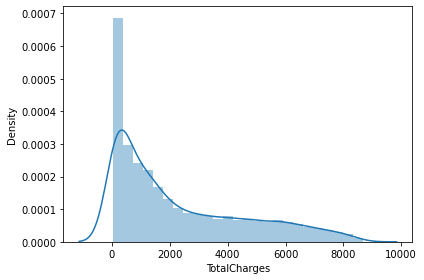

In [151]:
sns.distplot(data["TotalCharges"])
plt.xlabel("TotalCharges",fontsize=10)
plt.tight_layout()

# 
The data is skewed and will be dealt later

# Encoding object data into numeric data

In [158]:
#Encoding the features using LabelEncoder

from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for column in data:
    if data[column].dtype=='object':
        data[column]=enc.fit_transform(data[column].values.reshape(-1,1))

In [159]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


# Observation-
The categorical data for the below features have been encoded into numeric based on alphabetic order as follows-

gender-

 - 0- Female
 - 1- Male

Partner-

 - 0- No (Unmarried)
 - 1- Yes (Married)

Dependents-
  
 - 0- No (Independent) 
 - 1- Yes (Dependent)
    
PhoneService-

 - 0- No 
 - 1- Yes 

MultipleLines-

 - 0- No Multiple Line
 - 1- No Phone Service
 - 2- Yes 
    
InternetService-

 - 0- DSL Internet Service
 - 1- Fibre Optic Internet Service
 - 2- No internet service
    
OnlineSecurity-

 - 0- No online security
 - 1- No internet service
 - 2- Online security
    
OnlineBackup-

 - 0- No online backup
 - 1- No internet service
 - 2- Online backup

DeviceProtection-

 - 0- No device protection
 - 1- No internet service
 - 2- Device protection

TechSupport-

 - 0- No tech support
 - 1- No internet service
 - 2- Tech support

StreamingTV-

 - 0- No streaming tv
 - 1- No internet service
 - 2- Streaming TV

StreamingMovies-

 - 0- No streaming movies
 - 1- No internet service
 - 2- Streaming movies
    
Contract-

 - 0- Month to month
 - 1- One year
 - 2- Two year
    
PaperlessBilling-

 - 0- No
 - 1- Yes
 

 - 0- Bank transfer (automatic)
 - 1- Credit card (automatic)
 - 2- Electronic check
 - 3- Mailed check 

Churn-

 - 0- No
 - 1- Yes

In [176]:
#Statistical Analysis
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


# Checking Correlation

In [177]:
data.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.102395,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.318812,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.064535,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.824757,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.112851,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452883,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175429,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.254308,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.375362,-0.195525


# 
For better understanding let's use a heat map

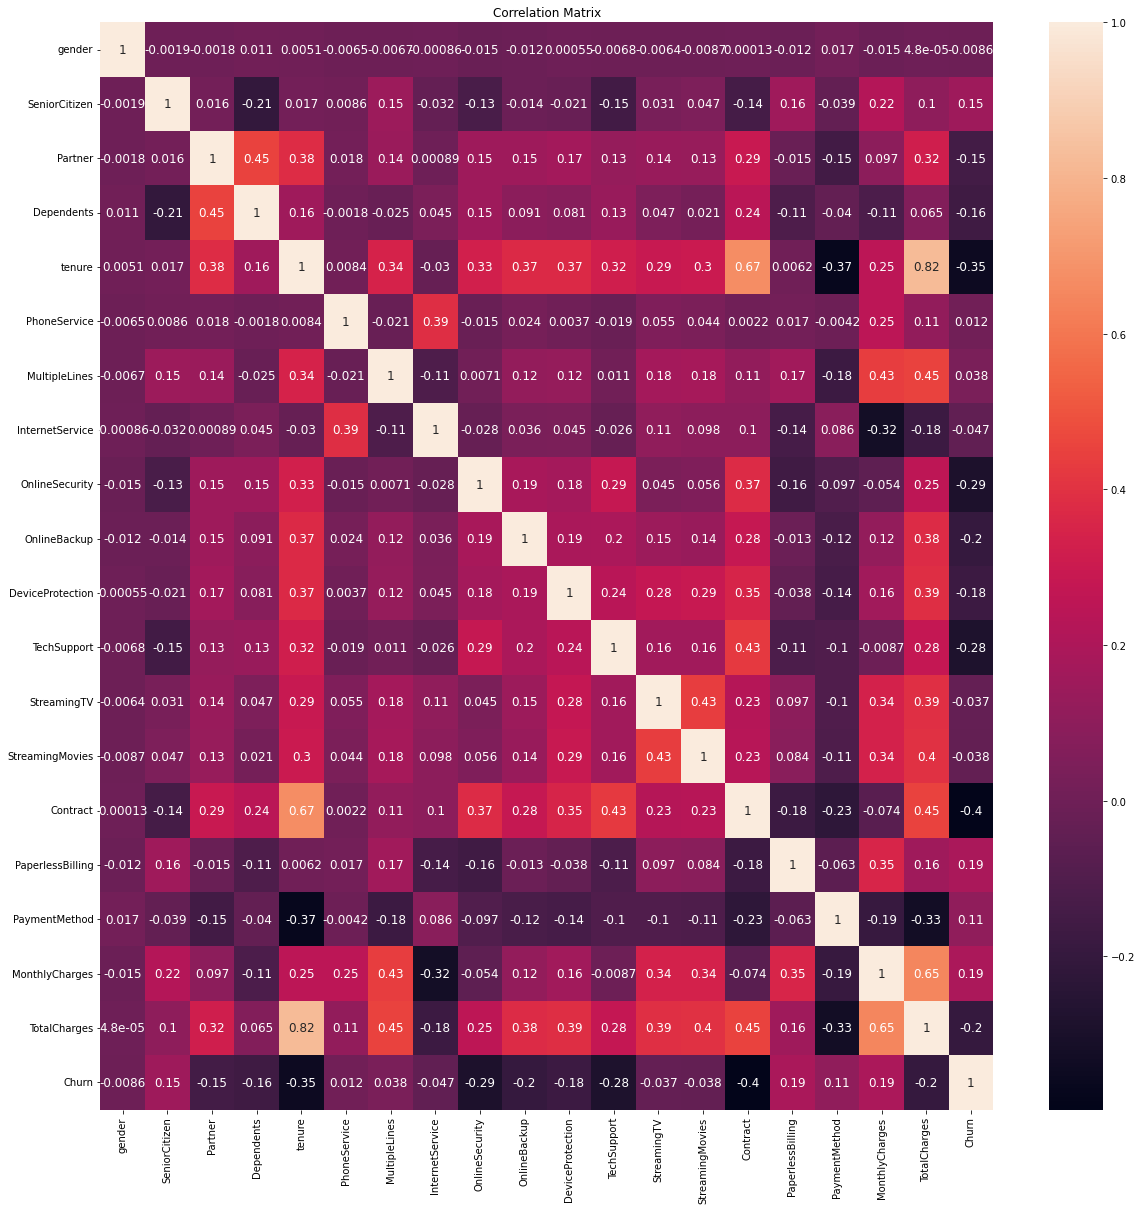

In [178]:
corr_mat=data.corr()

#size of the canvas
plt.figure(figsize=[20,20])

#plot the correlation matrix
sns.heatmap(corr_mat,annot=True, annot_kws={'size':12})
plt.title("Correlation Matrix")
plt.show()

# Observation-

Let's print the correlation values of independent values with target variable for a better understanding

In [179]:
#Let's print the correlation coefficient for the Prediction with churn

corr_matrix=data.corr()
corr_matrix["Churn"].sort_values(ascending=True)

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.199428
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

# Observation-
- Contract, tenure, OnlineSecurity, TechSupport, TotalCharges, OnlineBackup, DeviceProtection, Dependents, Partner, InternetService, StreamingMovies, StreamingTV and gender are negatively correlated to the label Churn
- PhoneService, MultipleLines, PaymentMethod, SeniorCitizen, PaperlessBilling and MonthlyCharges are positively correlated to the label Churn
- Contract are 39% negatively correlated to the label churn showing a moderately weak bond
- gender is 0.8% negatively correlated with churn showing an extremely weak bond
- PhoneService is 1.1% positively correlated with churn showing an extremely weak bond
- MonthlyCharges is 19% positively correlated with churn showing an moderately weak bond

In [180]:
data.shape

(7043, 20)

# Checking for outliers

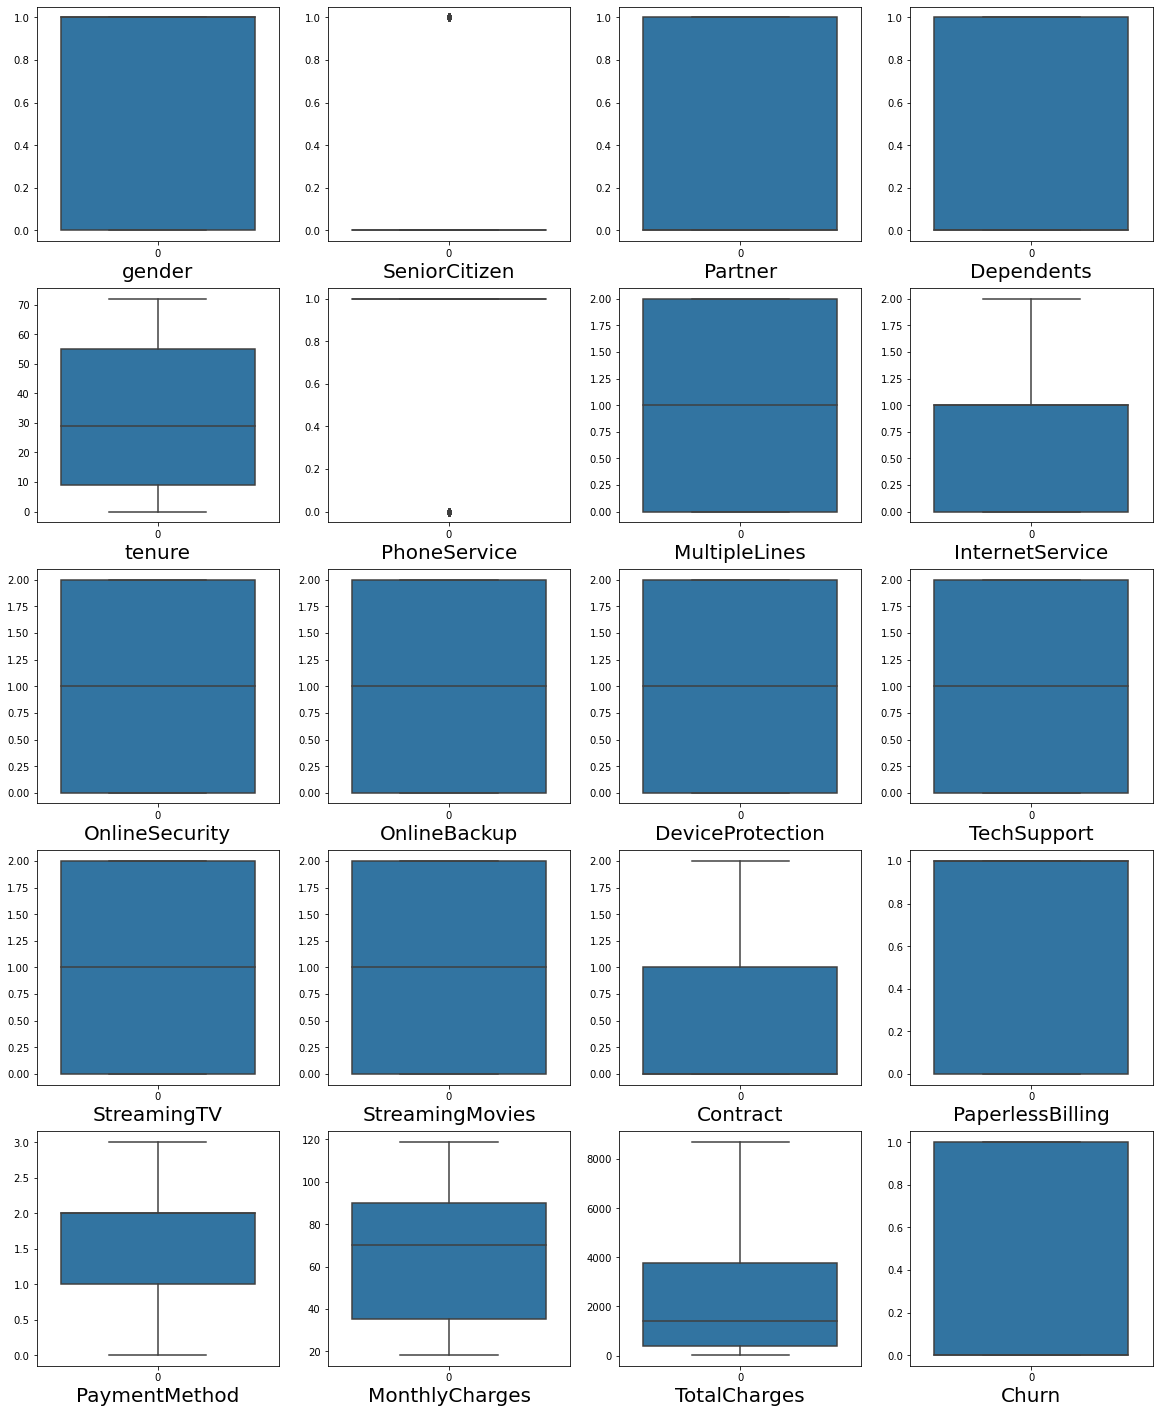

In [181]:
#visulaize the outliers using boxplot
plt.figure(figsize=(20,25))
graph=1

for column in data:
    if graph<=20:
        ax=plt.subplot(5,4,graph)
        sns.boxplot(data=data[column], orient='v')
        plt.xlabel(column,fontsize=20)
    graph=graph+1
plt.show()

# 
The features containing outliers-

- SeniorCitizen
- PhoneService

In [182]:
#remove outliers using zscore technique
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
z.shape

(7043, 20)

In [183]:
threshold=3
print(np.where(z>3))

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1

In [184]:
data_new=data[(z<3).all(axis=1)]
print(data.shape)
print(data_new.shape)

(7043, 20)
(6361, 20)


In [185]:
Dataloss= ((7043-6361)/7043)*100
Dataloss

9.683373562402386

# 
The data is getting biased not considering SeniorCitizens, hence outliers are not to be removed

# Divide Data Set into features and labels

In [186]:
y=data['Churn']
x=data.drop(columns=['Churn'])

In [187]:
#Confirming the skewness
x.skew().sort_values(ascending=False)

SeniorCitizen       1.833633
TotalCharges        0.962394
Dependents          0.875199
Contract            0.630959
OnlineSecurity      0.416985
TechSupport         0.402365
tenure              0.239540
InternetService     0.205423
DeviceProtection    0.186847
OnlineBackup        0.182930
MultipleLines       0.118719
Partner             0.067922
StreamingTV         0.028486
StreamingMovies     0.014657
gender             -0.019031
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
PaperlessBilling   -0.375396
PhoneService       -2.727153
dtype: float64

# 
Keeping +/-0.5 as the range of skewness, the columns not falling in this range are-

SeniorCitizen   
TotalCharges      
Dependents           
Contract
PhoneService            
            

Amongst the above features, Total Charges are continous and their skewness need to be removed

# Transforming Data to remove skewness

In [188]:
from sklearn.preprocessing import power_transform
x_n=power_transform(x)

In [189]:
#Checking if skewness was rectified
x_skew=pd.DataFrame(x_n, columns=x.columns)
x_skew.skew().sort_values(ascending=False)

SeniorCitizen       1.833633
Dependents          0.875199
Contract            0.302174
OnlineSecurity      0.149362
TechSupport         0.139751
Partner             0.067922
MultipleLines       0.033697
DeviceProtection    0.001051
OnlineBackup       -0.001417
gender             -0.019031
InternetService    -0.072384
StreamingTV        -0.097211
StreamingMovies    -0.105641
TotalCharges       -0.144899
PaymentMethod      -0.207559
tenure             -0.243325
MonthlyCharges     -0.259035
PaperlessBilling   -0.375396
PhoneService       -2.727153
dtype: float64

# 
Skewness has been removed, let's move forward

# Scaling the data

In [190]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x_skew)

# Using Logistic Regression Model

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [192]:
maxAccu=0     #maximum accuracy
maxRS=0       #best random state

#Finding Best random state
for i in range(0,200):
    x_train, x_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train, y_train)                #fitting the data will train the model
    predrf=LR.predict(x_test)               #this is the predicted target variable
    acc=accuracy_score(y_test, predrf)      #accuracy score
    print('accuracy', acc, 'random_state', i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('accuracy', maxAccu, 'random_state', i)

accuracy 0.794889992902768 random_state 0
accuracy 0.794889992902768 random_state 0
accuracy 0.8140525195173882 random_state 1
accuracy 0.8140525195173882 random_state 1
accuracy 0.8168914123491838 random_state 2
accuracy 0.8168914123491838 random_state 2
accuracy 0.8140525195173882 random_state 3
accuracy 0.7828246983676366 random_state 4
accuracy 0.7991483321504613 random_state 5
accuracy 0.815471965933286 random_state 6
accuracy 0.8119233498935415 random_state 7
accuracy 0.7927608232789212 random_state 8
accuracy 0.7991483321504613 random_state 9
accuracy 0.8161816891412349 random_state 10
accuracy 0.8055358410220014 random_state 11
accuracy 0.8048261178140526 random_state 12
accuracy 0.8183108587650816 random_state 13
accuracy 0.8183108587650816 random_state 13
accuracy 0.8232789212207239 random_state 14
accuracy 0.8232789212207239 random_state 14
accuracy 0.8069552874378992 random_state 15
accuracy 0.8041163946061036 random_state 16
accuracy 0.8019872249822569 random_state 17
accu

In [193]:
#creating train-test-sloit using best random state observed(i.e.35)
x_train, x_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=35)

In [194]:
LR=LogisticRegression()
LR.fit(x_train, y_train)                
predlr=LR.predict(x_test)               
print("Accuracy ",accuracy_score(y_test, predlr)*100)      #accuracy score
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy  82.9666430092264
[[979  83]
 [157 190]]
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89      1062
         1.0       0.70      0.55      0.61       347

    accuracy                           0.83      1409
   macro avg       0.78      0.73      0.75      1409
weighted avg       0.82      0.83      0.82      1409



# Using KNeighbors Classifier Model

In [195]:
from sklearn.neighbors import KNeighborsClassifier

kn=KNeighborsClassifier()
kn.fit(x_train, y_train)
predkn=kn.predict(x_test)
print("Accuracy ",accuracy_score(y_test, predkn)*100)      #accuracy score
print(confusion_matrix(y_test,predkn))
print(classification_report(y_test,predkn))

Accuracy  77.57274662881476
[[914 148]
 [168 179]]
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      1062
         1.0       0.55      0.52      0.53       347

    accuracy                           0.78      1409
   macro avg       0.70      0.69      0.69      1409
weighted avg       0.77      0.78      0.77      1409



# Using Decision Tree Classifier

In [196]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt=dt.predict(x_test)
print("Accuracy ",accuracy_score(y_test, preddt)*100)      #accuracy score
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy  74.37899219304471
[[878 184]
 [177 170]]
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83      1062
         1.0       0.48      0.49      0.49       347

    accuracy                           0.74      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.75      0.74      0.74      1409



# Using Random Forest Classifier

In [197]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print("Accuracy ",accuracy_score(y_test, predrf)*100)      #accuracy score
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy  80.8374733853797
[[972  90]
 [180 167]]
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      1062
         1.0       0.65      0.48      0.55       347

    accuracy                           0.81      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.80      0.81      0.80      1409



# Using AdaBoost Classifier

In [198]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier()
ada.fit(x_train, y_train)
predada=ada.predict(x_test)
print("Accuracy ",accuracy_score(y_test, predada)*100)      #accuracy score
print(confusion_matrix(y_test,predada))
print(classification_report(y_test,predada))

Accuracy  82.61178140525195
[[970  92]
 [153 194]]
              precision    recall  f1-score   support

         0.0       0.86      0.91      0.89      1062
         1.0       0.68      0.56      0.61       347

    accuracy                           0.83      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.82      0.83      0.82      1409



# Using Gradient Boosting Classifier

In [199]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt= GradientBoostingClassifier()
gbdt.fit(x_train, y_train)
gbdt_pred=gbdt.predict(x_test)
print("Accuracy ",accuracy_score(y_test, gbdt_pred)*100)      #accuracy score
print(confusion_matrix(y_test,gbdt_pred))
print(classification_report(y_test,gbdt_pred))

Accuracy  82.39886444286728
[[980  82]
 [166 181]]
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89      1062
         1.0       0.69      0.52      0.59       347

    accuracy                           0.82      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.81      0.82      0.82      1409



# Using SVC

In [200]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train, y_train)
ad_pred=svc.predict(x_test)
print("Accuracy ",accuracy_score(y_test, ad_pred)*100)      #accuracy score
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy  82.46983676366217
[[991  71]
 [176 171]]
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89      1062
         1.0       0.71      0.49      0.58       347

    accuracy                           0.82      1409
   macro avg       0.78      0.71      0.73      1409
weighted avg       0.81      0.82      0.81      1409



# Cross Validation

In [201]:
from sklearn.model_selection import cross_val_score

#validation accuracy
scr=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Logistic Regression: ", scr.mean())

Cross validation score of Logistic Regression:  0.801080210820053


In [202]:
scr2=cross_val_score(kn,x,y,cv=5)
print("Cross validation score of KNeighbor Classifier: ", scr2.mean())

Cross validation score of KNeighbor Classifier:  0.7627432616620428


In [203]:
scr3=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Decision Tree Classifier: ", scr3.mean())

Cross validation score of Decision Tree Classifier:  0.7261100514549326


In [204]:
scr4=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest Classifier: ", scr4.mean())

Cross validation score of Random Forest Classifier:  0.7888699472546616


In [205]:
scr5=cross_val_score(ada,x,y,cv=5)
print("Cross validation score of Ada Boost Classifier: ", scr5.mean())

Cross validation score of Ada Boost Classifier:  0.8036347103038907


In [206]:
scr6=cross_val_score(gbdt,x,y,cv=5)
print("Cross validation score of Gradient Boost Classifier: ", scr6.mean())

Cross validation score of Gradient Boost Classifier:  0.8046302382411769


In [207]:
scr7=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of SVC model: ", scr7.mean())

Cross validation score of SVC model:  0.7346301575908123


# 
Gradient Boost Classifier is performing better, hence it is carried forward

# Hyper Parameter Tuning

In [208]:
 GradientBoostingClassifier()

GradientBoostingClassifier()

In [213]:
from sklearn.model_selection import GridSearchCV

#Creating parameter list to pass in GridSearchCV
parameters={'max_depth':range(4,12,2), 'learning_rate':np.arange(0.001,0.6,0.01)}

grid=GridSearchCV(GradientBoostingClassifier(), param_grid=parameters)
grid.fit(x_train, y_train)
grid.best_params_

{'learning_rate': 0.06099999999999999, 'max_depth': 4}

In [214]:
grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.06099999999999999, max_depth=4)

In [215]:
grid_pred=grid.best_estimator_.predict(x_test)        #Predicting with best parameters
accuracy_score(y_test,grid_pred)    

0.8310858765081618

# AUC ROC curve

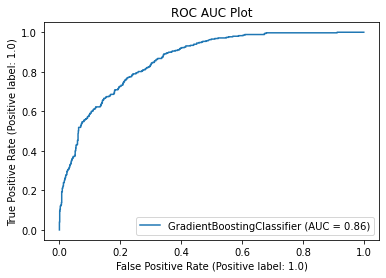

In [216]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(grid.best_estimator_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

# 
Final Accuracy is 86% and AUC score is 83%, which depicts that our model is working well

# Saving the Gradient Boosting Classifier Model

In [218]:
filename='Customer Churn Analysis.pkl'
pickle.dump(grid, open(filename,'wb'))